In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cancer=pd.read_csv('Cancer_Research.csv')
cancer.head()

,PatientID,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,61634,5.0,4,3.0,1,2,NaN,2,3,1.0,Benign
1,63375,9.0,1,2.0,6,4,10.0,7,7,2.0,Malignant
2,76389,10.0,4,7.0,2,2,8.0,6,1,1.0,Malignant
3,95719,6.0,10,10.0,10,8,10.0,7,10,7.0,Malignant
4,128059,1.0,1,1.0,1,2,5.0,5,1,1.0,Benign


In [53]:
cancer.set_index('PatientID', inplace=True)
cancer=pd.get_dummies(cancer, columns=['Class'], drop_first=True)
cancer=cancer.dropna()
cancer.isnull().sum()

ClumpThickness              0
UniformityofCellSize        0
UniformityofCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class_Malignant             0
dtype: int64

In [54]:
cancer.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class_Malignant
PatientID,,,,,,,,,,
63375,9.0,1,2.0,6,4,10.0,7,7,2.0,1
76389,10.0,4,7.0,2,2,8.0,6,1,1.0,1
95719,6.0,10,10.0,10,8,10.0,7,10,7.0,1
128059,1.0,1,1.0,1,2,5.0,5,1,1.0,0
142932,7.0,6,10.0,5,3,10.0,9,10,2.0,1


In [55]:
x_vars=cancer.drop('Class_Malignant ', axis=1)
y_var=cancer['Class_Malignant ']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_vars)
x_vars=scaler.transform(x_vars)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [56]:
from sklearn.manifold import TSNE

In [57]:
tsne=TSNE(perplexity=40,n_iter=4000)
X=tsne.fit_transform(x_vars)

In [58]:
from sklearn.cluster import KMeans


In [59]:
kmns=KMeans(n_clusters=2)

In [60]:
kmns.fit(X)
kY=kmns.predict(X)

Text(0.5, 1.0, 'Actual Cluster')

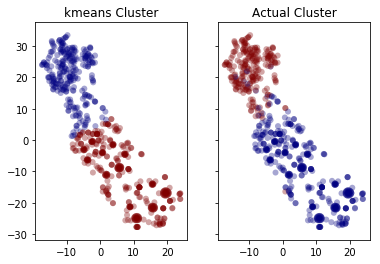

In [61]:
f, (ax1,ax2)=plt.subplots(1,2, sharey=True)
ax1.scatter(X[:,0], X[:,1], c=kY, cmap='jet', edgecolor='None', alpha=0.35)
ax1.set_title('kmeans Cluster')

ax2.scatter(X[:,0], X[:,1], c=y_var, cmap='jet', edgecolor='None', alpha=0.35)
ax2.set_title('Actual Cluster')

Text(0.5, 1.0, 'Actual clusters')

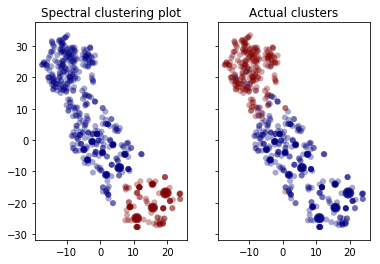

In [62]:
#Cluster using Spectral clustering and visualize using Isomap
from sklearn.cluster import SpectralClustering


# Play with gamma to optimize the clustering results
kmns = SpectralClustering(n_clusters=2,  gamma=0.15, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(X[:,0],X[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(X[:,0],X[:,1],  c = y_var, cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

Text(0.5, 1.0, 'Actual clusters')

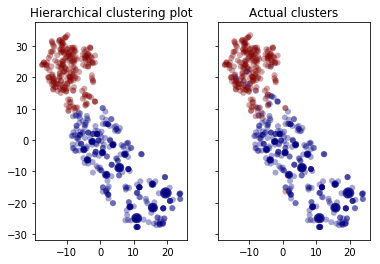

In [63]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kY = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(X[:,0],X[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(X[:,0],X[:,1],  c = y_var, cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')